Tutorial Link : https://www.youtube.com/watch?v=jmX4FOUEfgU

Github:https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/scipy_essentials.ipynb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

<h3>Basic

<h>

<h3>Optimization

In [5]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$



In [6]:
def f(x):
    return(x-3)**2

res = minimize(f,2)

In [7]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [8]:
res.x #Value of x at which the function is minimun

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$$$-x-2y+6 \geq 0$$$$-x + 2y + 2 \geq 0$$$$x \geq 0 $$$$y \geq 0 $$
drawing
2D function takes in vector $x$
Constraints must be specified as $g_i(x) \geq 0$
Bounds specified as rectangular

In [9]:
f = lambda x : (x[0]-1)**2 + (x[1] - 2.5)**2
cons = ({'type':'ineq', 'fun': lambda x: x[0]-2*x[1] +2},
       {'type':'ineq', 'fun': lambda x: -x[0]-2*x[1] +6},
       {'type':'ineq', 'fun': lambda x: -x[0]+2*x[1] +2})
bnds=((0,None),(0,None))
res = minimize(f,(2,0),bounds=bnds, constraints=cons)

In [10]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [11]:
res.x

array([1.4, 1.7])

In [14]:
# minimize?

<h3>Interpolation</h3> <p>means knowing the shape of function within our given range

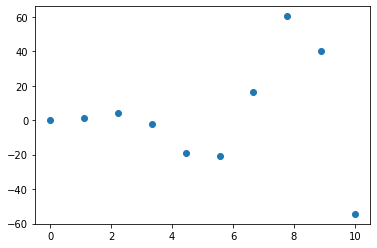

In [15]:
x = np.linspace(0,10,10)
y=x**2*np.sin(x)
plt.scatter(x,y)

In [16]:
from scipy.interpolate import interp1d

In [20]:
f = interp1d(x,y, kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

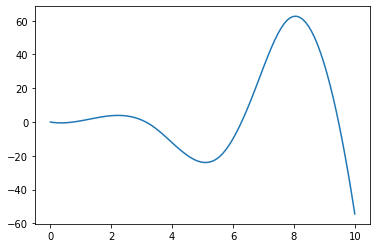

In [21]:
plt.plot(x_dense,y_dense)

<h3>Curve Fitting

In [22]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2+2

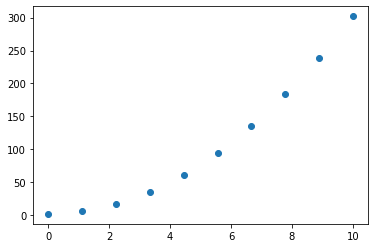

In [23]:
plt.scatter(x_data,y_data)

<p>
    want to fit the data to the curve $y = ax^2 +b.$ The main goal here is determine the value of a and b

In [24]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2 +b

popt, pcov = curve_fit(func, x_data,y_data, p0=(1,1))

In [25]:
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [26]:

t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

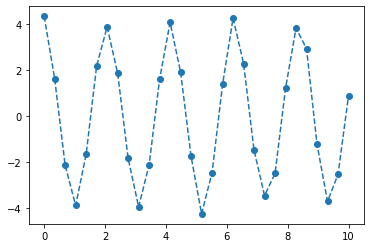

In [27]:
plt.plot(t_data,y_data,'o--')


$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

$\omega = 2 \pi (1/2) = \pi$
$A=4$
$\phi = 0$

In [30]:
def func(x,A,w,phi):
    return A*np.cos(w*x +phi)
popt, pcov = curve_fit(func, t_data,y_data,p0=(4,np.pi,0))

In [31]:
popt

array([3.94836219, 2.99899521, 0.10411352])

In [32]:
A,w,phi = popt

In [36]:
w

2.998995205451252

In [37]:
pcov #Covariance matrix

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [38]:
np.diag(pcov) #Show Variance A, w, phi

array([2.61882717e-03, 1.85637335e-05, 6.63423791e-04])

In [40]:
np.sqrt(np.diag(pcov)) #show error of A ,w, phi

array([0.05117448, 0.00430857, 0.02575701])

In [34]:
t = np.linspace(0,10,100)
y=func(t,A,w,phi)

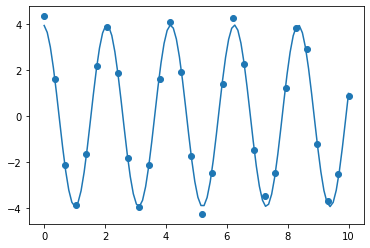

In [35]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [41]:
popt

array([3.94836219, 2.99899521, 0.10411352])

In [42]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575701])

<h3>Special Function</h3>
<p>Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

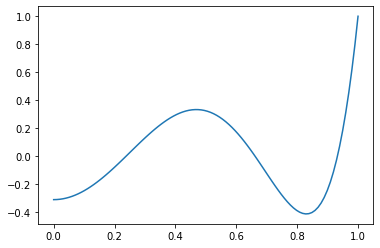

In [43]:
from scipy.special import legendre
x = np.linspace(0,1,100)
plt.plot(x,legendre(6)(x))
plt.show()

In [44]:
legendre(6)

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])


Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

Laplace's Equation in Polar Coordinates

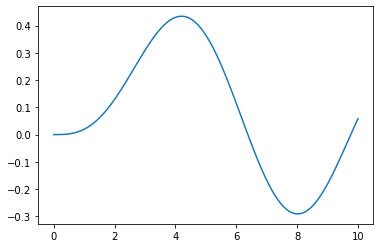

In [45]:
from scipy.special import jv
x = np.linspace(0,10,100)
plt.plot(x,jv(3,x))
plt.show()

<h2> Calculus

<h2> Differentiation

In [46]:
from scipy.misc import derivative

In [47]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)
x = np.linspace(0,1,100)

In [49]:
derivative(f,x, dx=1e-6)

array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

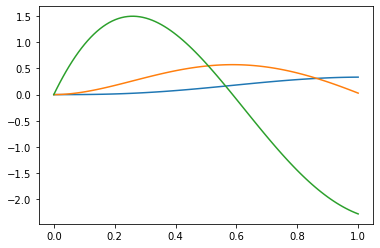

In [52]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x, dx=1e-6))
plt.plot(x,derivative(f,x, dx=1e-6, n=2))


<h3>Integration

Single integrals

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [55]:
from scipy.integrate import quad
integrand = lambda x:x**2*np.sin(x)*np.exp(-x)
integral, integral_error = quad(integrand,0,1) #0,1 are limits of integral 

In [56]:
integral_error

1.1376208786903388e-15

Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [60]:
from scipy.integrate import dblquad
integrand = lambda x,y: np.sin(x+y**2)
lwr_y = lambda x:-x
upr_y = lambda x:x**2
integral, integral_error = dblquad(integrand,0,1,lwr_y,upr_y)

In [62]:
integral_error

1.5634600713498928e-14

<h3> Differential Equation</h3>

First Order ODEs

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [60]:
from scipy.integrate import odeint

All inofrmation about differential equation

In [70]:
def dvdt(v,t):
    return 3*v**2-5
v0 = 0

Solve dufferential equation

In [71]:
t = np.linspace(0,1,100)
sol = odeint(dvdt, v0, t)

In [72]:
sol.T[0] # .T for transpose, [0] for accessing one dimension

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

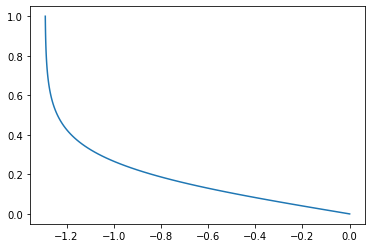

In [73]:
plt.plot(sol,t)

<b>Coupled first order ODEs</b>

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$
Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [78]:
def dSdx(S,x):
    y1, y2 = S
    return [y1+y2**2+3*x,
           3*y1+y2**3-np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [79]:
x = np.linspace(0,1,100)
sol = odeint(dSdx,S_0,x)

In [81]:
sol # first coloumn is y0 and second is y1

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [82]:
y1 = sol.T[0]
y2 = sol.T[1]

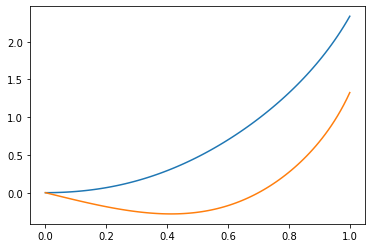

In [83]:
plt.plot(x,y1)
plt.plot(x,y2)

Second Order ODEs

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$
Scipy can only solve coupled first order ODEs, but <b>any second order ODE can be turned into two coupled first order ODEs.</b> The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$$$d \theta / dt = \omega $$
Let $S = (\theta, \omega)$

In [84]:
def dSdt(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [86]:
t =np.linspace(0,20 , 100)
sol = odeint(dSdt, S0,t)
theta, omega = sol.T

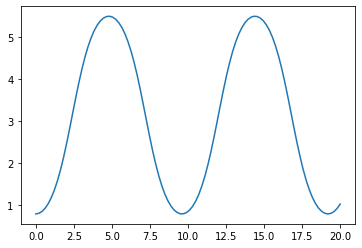

In [87]:
plt.plot(t, theta)
plt.show()

<h3>
    Fourier Transforms



The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$
$k/N$ represents a specific frequency (dimensionless)
can be converted to a frequency (Hz) if you know the spacing in $x$

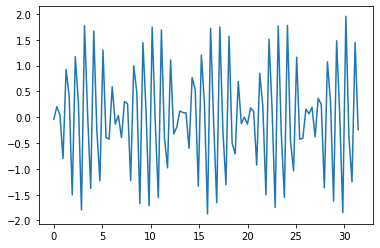

In [88]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
plt.plot(t,x)

In [100]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N,np.diff(t)[0])

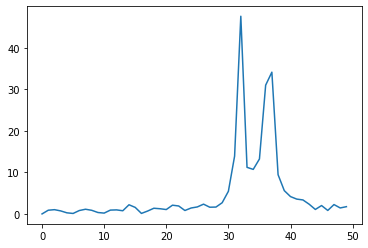

In [101]:
plt.plot(np.abs(y))

<h3>Examples</h3>
Example 1. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a plane is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$
Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work.

Then $x=A\sin(\pi t/10)$, $y=t$, and

$$\left| \frac{d\vec{r}}{dt} \right| = \sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)}$$$$\vec{F} \cdot d\vec{r} = \begin{bmatrix} 0 \\ -2/(A\sin(\pi t/10) +1)^2\\ \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10)\\ 1\\ \end{bmatrix} = -2/(A\sin(\pi t/10) +1)^2 $$
so that

$$ E = \int_{0}^{10} \left(5\sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)} + \frac{2}{(A\sin(\pi t/10) +100)^2}  \right) dt$$

<h1>Linear Algebra

<b>Basics</b>
Triangular matrices - Zeros above diagonal form triangle

$$ \begin{bmatrix} 3 &amp; 0 &amp; 0 &amp; 0\\ 2 &amp; 1 &amp; 0 &amp; 0 \\ 1 &amp; 0 &amp; 1 &amp; 0 \\ 1 &amp; 1 &amp; 1 &amp; 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [104]:
from scipy.linalg import solve_triangular
a = np.array([[3,0,0,1],
              [2,1,0,0],
              [1,0,1,0],
              [1,1,1,1]
])
b = np.array([4,2,4,2])
x = solve_triangular(a, b ,lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices (matrices with constant diagonals)

$$ \begin{bmatrix} 1 & -1 & -2 & -3\\ 3& 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [113]:
from scipy.linalg import toeplitz, solve_toeplitz

c = np.array([1, 3, 6, 10]) #First column of T
r = np.array([1,-1, -2, -3])  #First row of T
a = np.array([1, 2, 2, 5])

In [114]:
x = solve_toeplitz((c,r),a)

In [115]:
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

<b>Eigenvalue Problems</b>

<p>Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

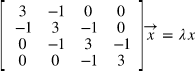

In [116]:
from scipy.linalg import eigh_tridiagonal

In [120]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w,v = eigh_tridiagonal(d, e)

In [122]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)

In [123]:
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [127]:
A@v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [128]:
w[1]*v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

<h3>Special Matrices

Fiedler matrix $A_{ij} = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [130]:
from scipy.linalg import fiedler
fiedler([1,4,12,45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])


Toeplitz matrices (matrices with constant diagonals)

In [131]:
from scipy.linalg import toeplitz

In [132]:
toeplitz([1,2,3,6,0,0],[1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices

<b>Decomposition</b>
<p>LU decomposition $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [137]:
from scipy.linalg import lu
A = np.array([[2,5,8, 7],[5, 2, 2, 8],[7, 5, 6, 6],[5, 4, 4, 8]])
p, l, u = lu(A)

Choleski decomposition: find matrix $C$ such that $A = CC^T$

In [139]:
from scipy.linalg import cholesky
A = np.array([[1, 0.2],[0.2, 1]])
C = cholesky(A, lower=True)

In [140]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [142]:
C@C.T # @MulMat

array([[1. , 0.2],
       [0.2, 1. ]])

In [143]:
A

array([[1. , 0.2],
       [0.2, 1. ]])

<h2>Sparse Matrices

Matrices that contain lots of zeros (so lots of space can be reduced)

A Useful Example:

The second derivative of $f(x_i) \equiv f_i$ is approximated as $\frac{d^2 f_i}{dx^2} \approx \frac{f_{i+1}+f_{i-1}-2f_i}{\Delta x^2}$. Suppose we have $f_0, ... f_4$ and $f_0=f_4=0$ (boundary conditions). Then the second derivative is approximated as

$$ D \begin{bmatrix} f_1 \\ f_2 \\ f_3\end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2 &amp; 1 &amp; 0 \\ 1 &amp; -2 &amp; 1 \\ 0 &amp; 1 &amp; -2 \end{bmatrix} $$
In 2D our function can be discretized on a grid

$$\begin{bmatrix} 0 &amp; 0 &amp; 0 &amp; 0 &amp; 0 \\ 0 &amp; f_{11} &amp; f_{12} &amp; f_{13} &amp; 0 \\ 0 &amp; f_{21} &amp; f_{22} &amp; f_{23} &amp; 0 \\ 0 &amp; f_{31} &amp; f_{32} &amp; f_{33} &amp; 0 \\ 0 &amp; 0 &amp; 0 &amp; 0 &amp; 0 \end{bmatrix} $$
but when doing this sort of work, its always better to store information in a vector

$$\begin{bmatrix} 0 &amp; 0 &amp; 0 &amp; 0 &amp; 0 \\ 0 &amp; f_{11} &amp; f_{12} &amp; f_{13} &amp; 0 \\ 0 &amp; f_{21} &amp; f_{22} &amp; f_{23} &amp; 0 \\ 0 &amp; f_{31} &amp; f_{32} &amp; f_{33} &amp; 0 \\ 0 &amp; 0 &amp; 0 &amp; 0 &amp; 0 \end{bmatrix} \to \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix}$$
What does the 2D laplacian look like? It turns out it is the "Kroncker sum" of our original matrix. The second derivative is given by

$$(D \oplus D) \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2 &amp; 1 &amp; 0 \\ 1 &amp; -2 &amp; 1 \\ 0 &amp; 1 &amp; -2 \end{bmatrix} $$
Note that even though $D$ is 3x3, $D \oplus D$ is 9x9.

In [145]:
from scipy.linalg import kron #Kronecker product, NOT sum
N =5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N),D)
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

Too big for any reasonable calculation! But can use sparse matrices

In [146]:
from scipy import sparse
N=100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2*sparse.kronsum(D,D)

In [147]:
T

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

See my 2D Schrodinger video for how I use this to construct eigenstates for arbitrary potentials!